# Variational principle
Code implementing the variational principle for a 1D potential.
To try different things, change:
- the potential function V
- the wavefunction psi
- the initial guess of the wavefunction parameters aguess

This file has the solution to the last part of HW8

In [56]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad
from scipy.misc import derivative

In [57]:
# some constants.  Changing mass will also change the energy scale.
#hbar = 1.055e-34 # Planck's constant (J s)
#mass = 1e-30 #  electron mass (kg)
#L = 1e-9 # well half-width (m)
#V0 = 1.6e-19 # well depth (J)
# rescaled units:
hbar =1.0
mass = 1.0
L = 1.0
xmin = -10*L; xmax = 10*L #limits of integration, may be np.inf (infinity)
V0 = 1.6e-19*1e-30*1e-9**2/1.055e-34**2
print(V0)

14.375238651422926


In [58]:
def V(x):
    # this example is the finite square well
    # make sure this function is "vectorizable" and does not have any division by zero
    return np.piecewise(x, [np.abs(x)<= L, np.abs(x)>L],[0.0,V0])

In [59]:
def psi(x,a):
    '''Wavefunction as a function of position x.
    The array "a" stores any parameters.'''
    # Note, normalization is not necessary
    #return np.exp(-x**2*a[0]) # gaussian
    return np.piecewise(x,[np.abs(x*a[0])<1.0,np.abs(x*a[0])>=1.0],[1.0+np.cos(a[0]*np.pi*x),0.0])# cosine piece

In [60]:
aguess = [1.0/L] # guess of the arguments that minimize the wavefunction

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
xlist = np.linspace(xmin, xmax, 101)
ylist = np.array([V(x) for x in xlist])
psilist = np.array([psi(x,aguess) for x in xlist])

In [63]:
def Hpsi(x,a):
    '''The Hamiltonian acting on psi at point x'''
    return -0.5*hbar**2/mass *derivative(psi, x, n=2, args=(a,)) + V(x)*psi(x,a)

In [64]:
def EVH(a, psi):
    '''Expectation value of the Hamiltonian for wavefunction psi that has the arguments a
    psi is a function of x and a
    a is a list of parameters for the wavefunction'''
    # Calculate normalization of psi
    norm = quad(lambda x, a:np.abs(psi(x,a))**2, xmin, xmax, args=(a,))[0]
    ev = quad(lambda x, a:np.conj(psi(x,a))*Hpsi(x,a), xmin, xmax, args=(a,))[0]
    return ev/norm

In [65]:
initEV = EVH(aguess,psi)
print("Initial energy of guess = {}".format(initEV))
output = minimize(EVH, aguess, args=(psi,))
outlist = np.array([psi(x,output.x) for x in xlist])

Initial energy of guess = 0.8333333333443125


C:\Users\corcovilost\AppData\Local\Continuum\miniconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [66]:
problist = np.array([np.abs(psi(x,output.x))**2 for x in xlist])


In [67]:
print("Minimum energy: {} for arguments {}".format(output.fun,output.x))

Minimum energy: 0.6586559520779786 for arguments [0.73332574]


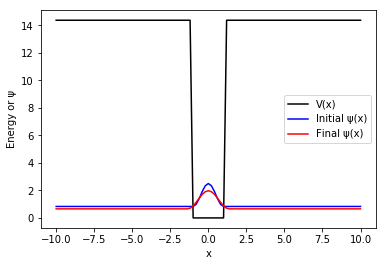

In [69]:
plt.plot(xlist,ylist,'k-', label = "V(x)")
plt.plot(xlist,(psilist+1)*initEV,'b-', label = "Initial ψ(x)")
plt.plot(xlist,(outlist+1)*output.fun,'r-', label = "Final ψ(x)")
#plt.plot(xlist,problist+output.fun, 'g-', label = "|ψ(x)|^2")
plt.legend();
plt.xlabel("x");
plt.ylabel("Energy or ψ");

Gaussian psi: Minimum energy: 0.6970861111798174 for arguments 1.87843196